# 1. Introdução

A sustentabilidade é um tema cada vez mais relevante na sociedade atual, este projeto tem como objetivo analisar e avaliar o estilo de vida das pessoas com base em um dataset que mede a sustentabilidade de suas ações cotidianas e assim construir um modelo de predição.

Descrição do dataset:

ParticipantID: Um identificador único para cada participante.<br>
Age: A idade do participante.<br>
Location: A localização do participante (Urbano, Suburbano ou Rural).<br>
DietType: A preferência alimentar do participante (Principalmente à base de plantas, Equilibrada ou Principalmente à base de animais).<br>
LocalFoodFrequency: Com que frequência o participante consome alimentos de origem local (Frequentemente, Às vezes ou Raramente).<br>
TransportationMode: O principal modo de transporte usado pelo participante (Bicicleta, Transporte Público, Carro ou Caminhada).<br>
EnergySource: A principal fonte de energia usada na casa do participante (Renovável, Mista ou Não Renovável).<br>
HomeType: O tipo de moradia em que o participante vive (Apartamento ou Casa).<br>
HomeSize: O tamanho da casa do participante em pés quadrados.<br>
ClothingFrequency: Com que frequência o participante compra roupas novas (Frequentemente, Às vezes ou Raramente).<br>
SustainableBrands: Se o participante prioriza comprar de marcas sustentáveis (Verdadeiro ou Falso).<br>
EnvironmentalAwareness: Uma classificação (1-5) que indica o nível de consciência ambiental do participante.<br>
CommunityInvolvement: O nível de envolvimento do participante na comunidade (Alto, Moderado ou Baixo).<br>
MonthlyElectricityConsumption: O consumo médio mensal de eletricidade do participante em quilowatt-horas.<br>
MonthlyWaterConsumption: O consumo médio mensal de água do participante em galões.<br>
Gender: O gênero do participante (Masculino, Feminino ou Não Binário).<br>
UsingPlasticProducts: Com que frequência o participante usa produtos plásticos (Frequentemente, Às vezes ou Raramente).<br>
DisposalMethods: O principal método que o participante usa para descartar resíduos (Compostagem, Reciclagem, Aterro ou Combinação).<br>
PhysicalActivities: O nível de atividade física do participante (Alto, Moderado ou Baixo).<br>
Rating: A classificação geral de sustentabilidade atribuída ao participante (1-5).<br>

# 2. Importando bibliotecas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (StandardScaler,
                                  OneHotEncoder,
                                  LabelEncoder,
                                  OrdinalEncoder)
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.base import (BaseEstimator,
                          TransformerMixin)
from sklearn.metrics import (confusion_matrix,
                            accuracy_score)

# 3. Analisando estrutura do dataset

In [2]:
life = pd.read_csv('C:/DataSets/lifestyle_sustainability_data.csv')

In [3]:
life.head()

,ParticipantID,Age,Location,DietType,LocalFoodFrequency,TransportationMode,EnergySource,HomeType,HomeSize,ClothingFrequency,SustainableBrands,EnvironmentalAwareness,CommunityInvolvement,MonthlyElectricityConsumption,MonthlyWaterConsumption,Gender,UsingPlasticProducts,DisposalMethods,PhysicalActivities,Rating
0,1,35,Urban,Mostly Plant-Based,Often,Bike,Renewable,Apartment,800,Rarely,True,5,High,100,1500,Female,Rarely,Composting,High,5
1,2,28,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1500,Sometimes,True,4,Moderate,250,3000,Male,Sometimes,Recycling,Moderate,4
2,3,65,Rural,Mostly Animal-Based,Rarely,Car,Non-Renewable,House,2500,Often,False,2,Low,400,4500,Male,Often,Landfill,Low,1
3,4,42,Urban,Mostly Plant-Based,Often,Walk,Renewable,Apartment,950,Sometimes,True,4,Moderate,150,2000,Female,Rarely,Recycling,High,5
4,5,31,Suburban,Balanced,Sometimes,Public Transit,Mixed,House,1800,Often,True,3,Low,300,3500,Non-Binary,Sometimes,Combination,Moderate,3


In [4]:
life = life.drop(columns = ['ParticipantID'])

In [5]:
print(f'O dataset possui {life.shape[0]} linhas e {life.shape[1]} colunas')

O dataset possui 499 linhas e 19 colunas


In [6]:
life.isna().sum()

Age                                0
Location                           0
DietType                           0
LocalFoodFrequency                 0
TransportationMode                 0
EnergySource                       0
HomeType                           0
HomeSize                           0
ClothingFrequency                  0
SustainableBrands                  0
EnvironmentalAwareness             0
CommunityInvolvement             118
MonthlyElectricityConsumption      0
MonthlyWaterConsumption            0
Gender                             0
UsingPlasticProducts               0
DisposalMethods                    0
PhysicalActivities               108
Rating                             0
dtype: int64

In [7]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            499 non-null    int64 
 1   Location                       499 non-null    object
 2   DietType                       499 non-null    object
 3   LocalFoodFrequency             499 non-null    object
 4   TransportationMode             499 non-null    object
 5   EnergySource                   499 non-null    object
 6   HomeType                       499 non-null    object
 7   HomeSize                       499 non-null    int64 
 8   ClothingFrequency              499 non-null    object
 9   SustainableBrands              499 non-null    bool  
 10  EnvironmentalAwareness         499 non-null    int64 
 11  CommunityInvolvement           381 non-null    object
 12  MonthlyElectricityConsumption  499 non-null    int64 
 13  Month

In [8]:
life = life.dropna(axis = 1)

In [9]:
life.nunique()

Age                               60
Location                           3
DietType                           3
LocalFoodFrequency                 4
TransportationMode                 4
EnergySource                       3
HomeType                           3
HomeSize                         362
ClothingFrequency                  4
SustainableBrands                  2
EnvironmentalAwareness             5
MonthlyElectricityConsumption    224
MonthlyWaterConsumption          295
Gender                             4
UsingPlasticProducts               4
DisposalMethods                    4
Rating                             5
dtype: int64

In [10]:
print(f'O dataset possui {(life.nunique() <= 15).sum()} colunas categóricas e {(life.nunique() > 15).sum()} colunas numéricas')

O dataset possui 13 colunas categóricas e 4 colunas numéricas


In [11]:
numerics = [col for col in life.columns if life[col].nunique() > 15]

In [12]:
life[numerics].describe()

,Age,HomeSize,MonthlyElectricityConsumption,MonthlyWaterConsumption
count,499.000000,499.000000,499.000000,499.000000
mean,44.052104,1518.046092,291.963928,3139.521042
std,14.904828,672.212235,120.482275,1224.609306
min,18.000000,407.000000,55.000000,536.000000
25%,31.000000,951.500000,185.000000,2000.000000
50%,44.000000,1450.000000,295.000000,3350.000000
75%,58.000000,1995.000000,400.000000,4100.000000
max,96.000000,2997.000000,498.000000,5250.000000


# 4. Análise exploratória (EDA)

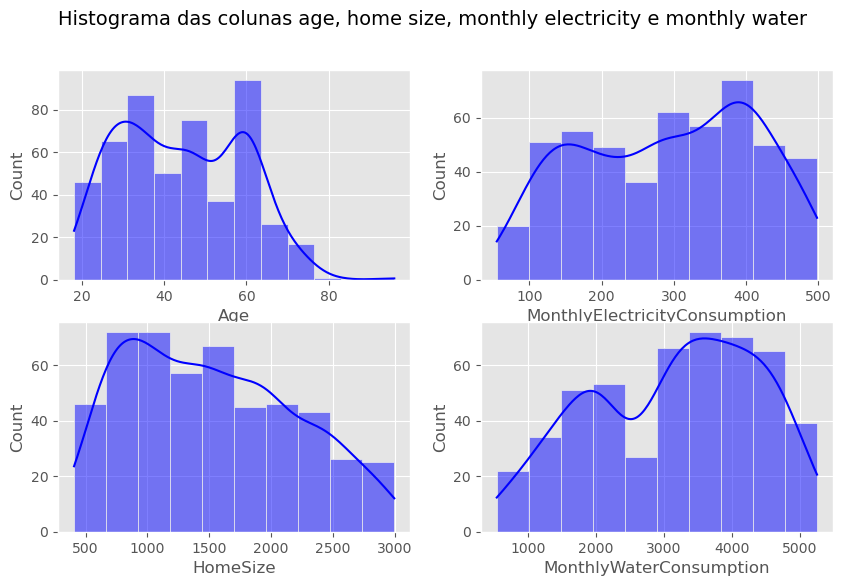

In [13]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

for i, col in enumerate(numerics):
    
    sns.histplot(x = col, data = life, kde = True, color = 'blue', ax = axs[i % 2][i // 2])
    
plt.suptitle('Histograma das colunas age, home size, monthly electricity e monthly water', fontsize = 14)

plt.show()

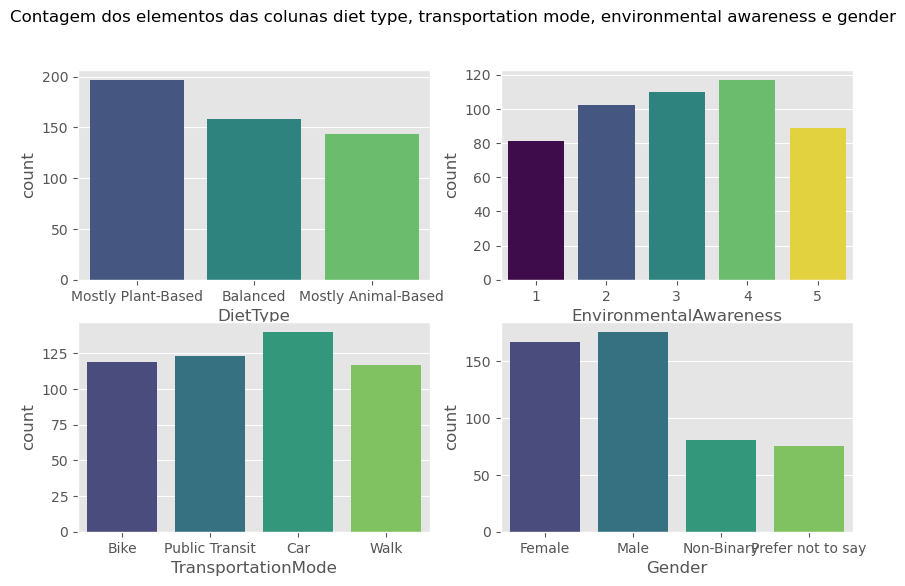

In [14]:
fig, axs = plt.subplots(2, 2, figsize = (10, 6))

for i, col in enumerate(['DietType', 'TransportationMode', 'EnvironmentalAwareness', 'Gender']):
    
    sns.countplot(x = col, hue = col, data = life, palette = 'viridis', legend = False, ax = axs[i % 2][i // 2])
    
plt.suptitle('Contagem dos elementos das colunas diet type, transportation mode, environmental awareness e gender', fontsize = 12)

plt.show()

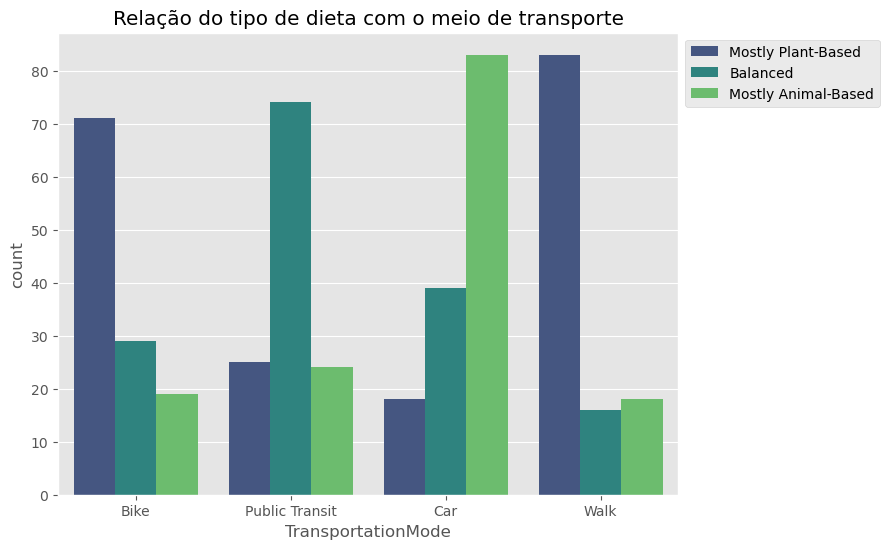

In [15]:
plt.figure(figsize = (8, 6))

sns.countplot(x = 'TransportationMode', hue = 'DietType', data = life, palette = 'viridis')
plt.title('Relação do tipo de dieta com o meio de transporte')
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))

plt.show()

Com este simples gráfico podemos notar que o meio de transporte da pessoa interage com sua dieta, pessoas que tem uma mobilidade sustentável tendem a comer mais vegetais ja pessoas que usam meios de transporte poluentes tendem a ter uma dieta balanceada ou baseada em carnes animais

In [16]:
source_electricity_consumption = life.groupby('EnergySource')['MonthlyElectricityConsumption'].mean()

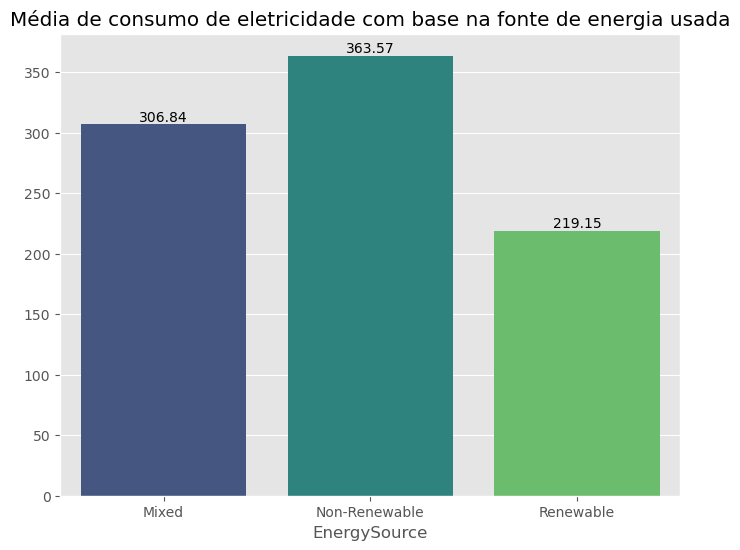

In [17]:
plt.figure(figsize = (8, 6))

sns.barplot(x = source_electricity_consumption.index, hue = source_electricity_consumption.index, y = source_electricity_consumption.values, palette = 'viridis')
plt.title('Média de consumo de eletricidade com base na fonte de energia usada')

for i, v in enumerate(source_electricity_consumption.values):
    plt.text(i, v, str(f'{v:.2f}'), ha = 'center', va = 'bottom')

plt.show()

In [18]:
corr = life[['HomeSize', 'MonthlyElectricityConsumption', 'MonthlyWaterConsumption']].corr()

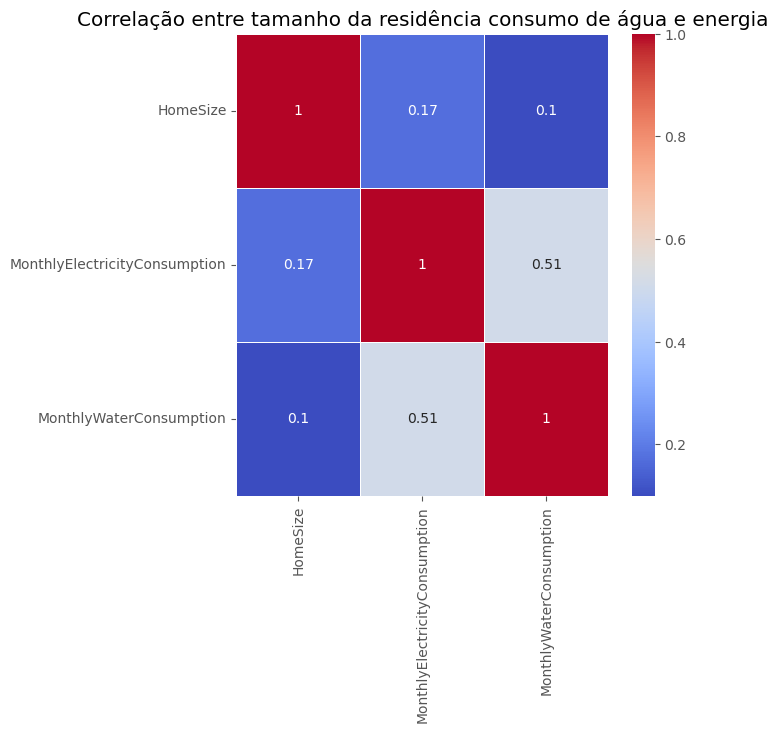

In [19]:
plt.figure(figsize = (6, 6))

sns.heatmap(corr, annot = True, cmap = 'coolwarm', linewidths=0.5)
plt.title('Correlação entre tamanho da residência consumo de água e energia')

plt.show()

In [20]:
environmental_energy_water = life.groupby('EnvironmentalAwareness')[['MonthlyElectricityConsumption', 'MonthlyWaterConsumption']].mean()

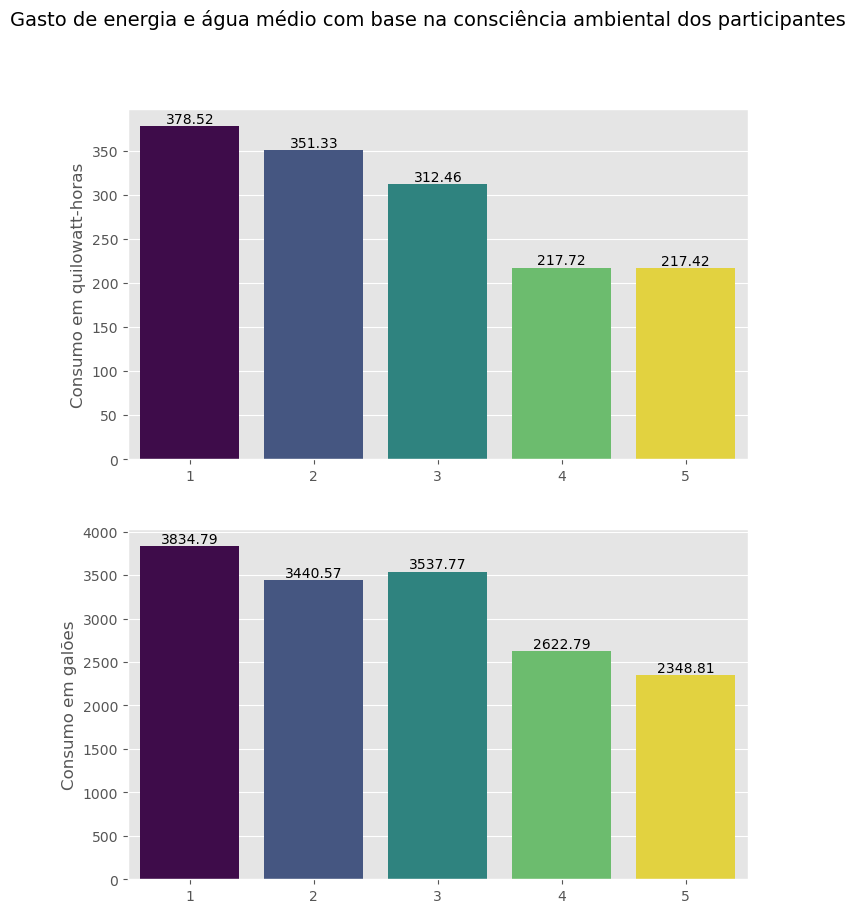

In [21]:
fig, axs = plt.subplots(2, 1, figsize = (8, 10))

sns.barplot(x = environmental_energy_water.index, hue = environmental_energy_water.index, y = 'MonthlyElectricityConsumption', data = environmental_energy_water, legend = False, palette = 'viridis', ax = axs[0])
axs[0].set_xlabel('')
axs[0].set_ylabel('Consumo em quilowatt-horas', fontsize = 12)

for i, v in enumerate(environmental_energy_water['MonthlyElectricityConsumption']):
    axs[0].text(i, v, str(f'{v:.2f}'), ha = 'center', va = 'bottom')

sns.barplot(x = environmental_energy_water.index, hue = environmental_energy_water.index, y = 'MonthlyWaterConsumption', data = environmental_energy_water, legend = False, palette = 'viridis', ax = axs[1])
axs[1].set_xlabel('')
axs[1].set_ylabel('Consumo em galões', fontsize = 12)

for i, v in enumerate(environmental_energy_water['MonthlyWaterConsumption']):
    axs[1].text(i, v, str(f'{v:.2f}'), ha = 'center', va = 'bottom')

plt.suptitle('Gasto de energia e água médio com base na consciência ambiental dos participantes', fontsize = 14)


plt.show()

# 5. Feature engineering

In [22]:
X = life.drop(columns = ['Rating'])

y = life['Rating']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
class KMeansTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=5):
        self.n_clusters = n_clusters
        self.kmeans = KMeans(n_clusters=self.n_clusters)
        
    def fit(self, X, y=None):
        self.kmeans.fit(X)
        return self
    
    def transform(self, X):
        return self.kmeans.predict(X).reshape(-1, 1)

In [141]:
target_encoder_columns = ['Location', 'DietType', 'TransportationMode', 'DisposalMethods']
count_encoder_columns = ['LocalFoodFrequency', 'HomeType', 'ClothingFrequency', 'UsingPlasticProducts']
one_hot_encoder_columns = ['EnergySource', 'Gender']
ordinal_encoder_columns = ['SustainableBrands', 'EnvironmentalAwareness']
kmeans_columns = ['Age', 'HomeSize', 'MonthlyElectricityConsumption', 'MonthlyWaterConsumption']

In [142]:
preprocessor = ColumnTransformer(
    transformers = [
        ('target_encoder', ce.TargetEncoder(), target_encoder_columns),
        ('count_encoder', ce.CountEncoder(normalize = True), count_encoder_columns),
        ('one_hot_encoder', OneHotEncoder(), one_hot_encoder_columns),
        ('ordinal_encoder', OrdinalEncoder(), ordinal_encoder_columns),
        ('kmeans', KMeansTransformer(n_clusters = 5), kmeans_columns)
    ],
    remainder='passthrough'
)

In [143]:
pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators = 500))
])

In [144]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('target_encoder',
                                                  TargetEncoder(),
                                                  ['Location', 'DietType',
                                                   'TransportationMode',
                                                   'DisposalMethods']),
                                                 ('count_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               normalize=True),
                                                  ['LocalFoodFrequency',
                                                   'HomeType',
                                                   'ClothingFrequency',
                                                   'UsingPlasticProducts']),
                                                 ('one_hot_encoder',
                                                  OneHotEncoder(),
                                                  ['EnergySource', 'Gender']),
                                                 ('ordinal_encoder',
                                                  OrdinalEncoder(),
                                                  ['SustainableBrands',
                                                   'EnvironmentalAwareness']),
                                                 ('kmeans', KMeansTransformer(),
                                                  ['Age', 'HomeSize',
                                                   'MonthlyElectricityConsumption',
                                                   'MonthlyWaterConsumption'])])),
                ('model', RandomForestClassifier(n_estimators=500))])

In [145]:
y_pred = pipeline.predict(X_test)

# 6. Validando modelo

In [146]:
labels = [1, 2, 3, 4, 5]

In [147]:
confusion = confusion_matrix(y_test, y_pred, labels = labels)

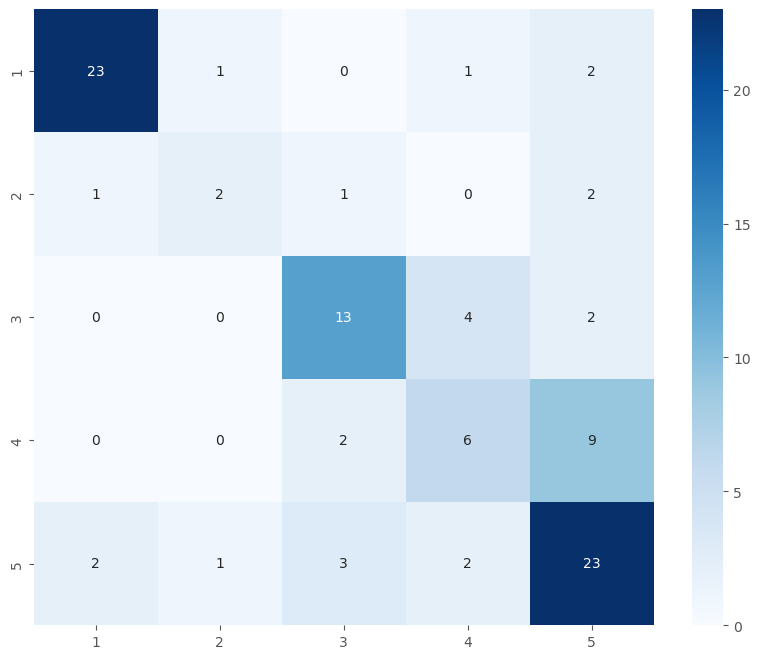

In [148]:
plt.figure(figsize = (10, 8))

sns.heatmap(confusion, annot = True, fmt = 'd', cmap = 'Blues',
            xticklabels = labels,
            yticklabels = labels)

plt.show()

In [149]:
accuracy = accuracy_score(y_test, y_pred)

In [150]:
print(f'Acurácia do modelo: {accuracy}')

Acurácia do modelo: 0.67


Obtivemos um modelo com acurácia de 67%, como podemos ver a matrix de confusão nosso modelo teve grandes dificuldades em acetar o target de valor 5